In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
im =cv2.resize(cv2.imread('elaine.TIFF',0),(512,512))

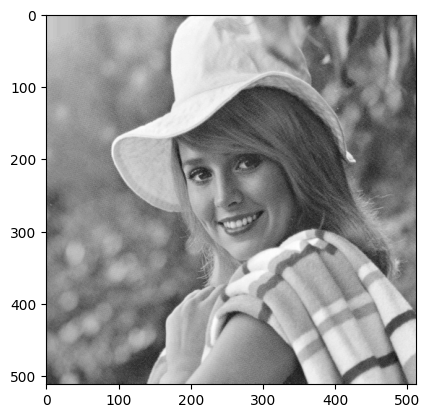

In [3]:
plt.imshow(im,cmap='gray')
plt.show()

In [4]:
pixels =im.reshape(im.size,1)
pixels
k = 5

In [5]:
inertia=[]
for i in range(1,21):
    km=KMeans(n_clusters =i)
    km.fit(pixels)
    inertia.append(km.inertia_)

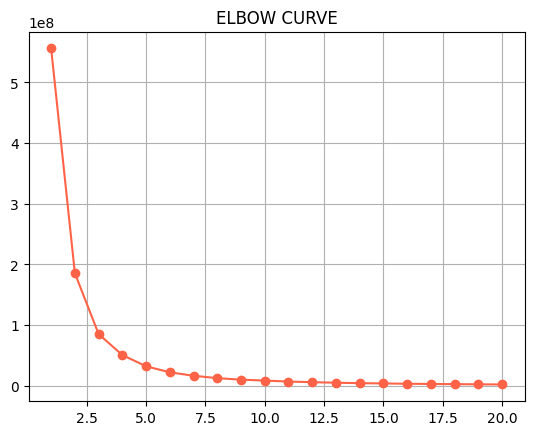

In [6]:
plt.plot(range(1,21),inertia,color='tomato',marker='o')
plt.title('ELBOW CURVE')
plt.grid(True)
plt.show()

In [7]:
km=KMeans(n_clusters =k)

In [8]:
km.fit(pixels)

KMeans(n_clusters=5)

In [9]:
km.inertia_

32270852.073756333

In [10]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
pixels.shape

(262144, 1)

In [12]:
df=pd.DataFrame(data=im.ravel(),columns =["Pixel"])
df['Cluster']=km.labels_

In [13]:
df.head()

,Pixel,Cluster
0,190,0
1,190,0
2,190,0
3,190,0
4,190,0


In [14]:
pixrange = []
for i in range(k):
    m1 = df[df.Cluster == i]["Pixel"].max()
    m2 = df[df.Cluster == i]["Pixel"].min()
    pixrange.append((m1, m2))


In [15]:
pixrange

[(193, 155), (120, 86), (243, 194), (85, 0), (154, 121)]

In [16]:
def assingnnew(x,list1):
    for i in range(len(list1)):
        if x<=list1[i][0] and x>=list1[i][1]:
            return 1

In [17]:
df['Caption'] = df['Pixel'].apply(assingnnew, args=[pixrange])
df


,Pixel,Cluster,Caption
0,190,0,1
1,190,0,1
2,190,0,1
3,190,0,1
4,190,0,1
...,...,...,...
262139,153,4,1
262140,167,0,1
262141,169,0,1
262142,167,0,1


In [18]:
new_image=np.array(df['Caption']).reshape(im.shape)

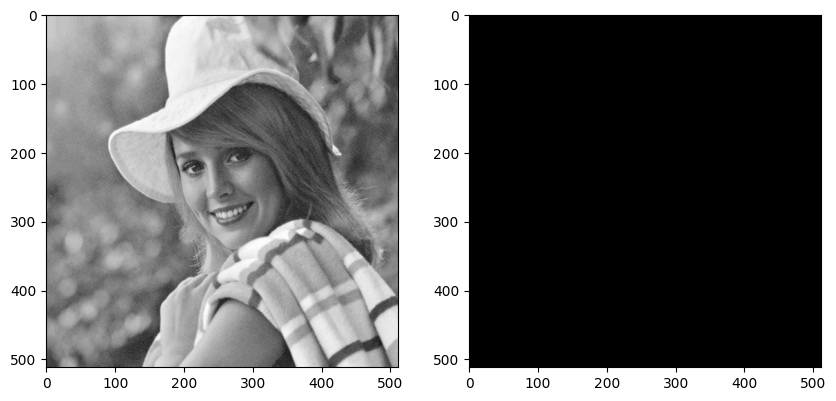

In [19]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(new_image,cmap='gray')
plt.show()
